In [61]:
import pandas as pd

# Load the full dataset
df = pd.read_csv("train_features.csv")

# Identify historical weather columns (they contain '_h' in their name)
historical_weather_cols = [col for col in df.columns if '_h' in col]

# Keep only rows where at least one historical weather column is not null
df_historical_only = df[df[historical_weather_cols].notna().any(axis=1)]

# Optionally keep datetime, county, data_block_id for reference
reference_cols = ['datetime', 'county']
reference_cols = [col for col in reference_cols if col in df.columns]
df_historical_only = df_historical_only[reference_cols + historical_weather_cols]

df['datetime'] = pd.to_datetime(df['datetime'])

# Identify columns to aggregate (exclude datetime and county)
columns_to_average = [col for col in df.columns if col not in ['datetime', 'county']]

# Group by county and compute the average of each column
df_avg = df.groupby('county')[columns_to_average].mean(numeric_only=True).reset_index()

In [116]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("train_features.csv")

# Identify the historical weather columns (containing "_h")
historical_weather_cols = [col for col in df.columns if '_h' in col]

# Drop rows with no weather data
df = df[df[historical_weather_cols].notna().any(axis=1)]

# Group by county and compute the mean of all weather columns
avg_by_county = df.groupby("county")[historical_weather_cols].mean(numeric_only=True).reset_index()

# Preview
avg_by_county.head(20)

,county,temperature_h_mean,dewpoint_h_mean,rain_h_mean,snowfall_h_mean,surface_pressure_h_mean,cloudcover_total_h_mean,cloudcover_low_h_mean,cloudcover_mid_h_mean,cloudcover_high_h_mean,windspeed_10m_h_mean,winddirection_10m_h_mean,shortwave_radiation_h_mean,direct_solar_radiation_h_mean,diffuse_radiation_h_mean,hour_h,cloudcover_high_f_mean
0,0,5.464270,1.921697,0.046210,0.016302,1009.897249,60.992375,46.603390,34.790645,36.481317,4.592412,198.782915,104.994437,64.286843,40.707594,11.495962,0.396746
1,1,6.739308,3.063037,0.048789,0.012608,1013.220445,57.362826,42.531020,31.748249,36.060415,5.492810,196.128303,108.622302,67.638887,40.983415,11.495319,0.389220
2,2,4.872725,1.328183,0.047444,0.019455,1007.304609,63.440709,49.387255,36.911375,36.277062,3.762525,199.086865,105.180505,62.674664,42.505841,11.497514,0.400295
3,3,4.809811,1.370632,0.045325,0.018201,1004.243020,63.567681,50.041593,35.508674,36.248925,3.792208,200.129558,101.385990,58.484015,42.901975,11.495319,0.397029
4,4,5.031172,1.568159,0.044251,0.017830,1006.253032,63.500480,49.507267,36.258345,36.181822,4.188260,198.718476,105.406701,61.639738,43.766963,11.496108,0.397678
5,5,5.002672,1.538298,0.045298,0.018110,1006.129784,63.595856,49.696899,35.911778,36.233619,4.243215,198.471925,103.614071,61.671543,41.942528,11.495273,0.401622
6,6,6.220666,2.838442,0.050267,0.014823,1012.280851,58.242193,43.346137,32.868347,36.273453,6.075732,196.602897,109.537660,68.345172,41.192488,11.495319,0.394358
7,7,5.771565,2.338451,0.051326,0.016243,1011.711846,61.765438,47.708146,34.387803,35.975634,4.746129,199.232956,102.332305,61.280208,41.052097,11.495030,0.393091
8,8,5.355653,1.658894,0.044792,0.016282,1009.670448,63.446743,49.032930,36.731849,35.880065,4.095876,199.553781,104.704092,61.893224,42.810867,11.495319,0.391553
9,9,5.358093,1.792454,0.049416,0.016921,1008.283422,61.978745,48.038887,34.630878,36.275810,3.787831,200.180600,105.004386,62.483011,42.521375,11.495319,0.396016


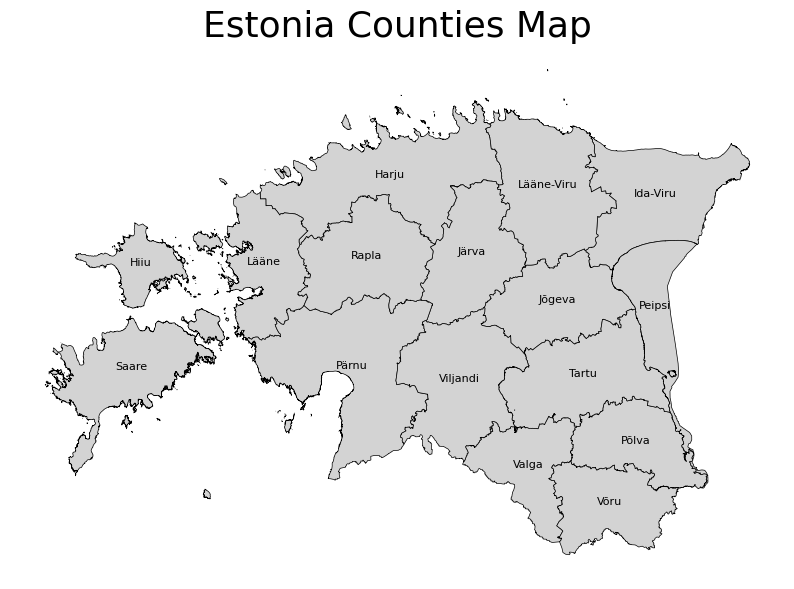

In [146]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
gdf = gpd.read_file("gadm36_EST_1.shp")

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', color='lightgray')

# Add labels
if 'NAME_1' in gdf.columns:
    for idx, row in gdf.iterrows():
        plt.annotate(row['NAME_1'],
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8)

ax.set_title("Estonia Counties Map")
plt.axis('off')
plt.show()

In [50]:
gdf.head(15)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,EST,Estonia,EST.1_1,Harju,Harjumaa|Harju maakond,None,Maakond,County,None,EE.HA,"MULTIPOLYGON (((23.95908 59.32117, 23.95928 59..."
1,EST,Estonia,EST.2_1,Hiiu,Hiiumaa|Hiiu maakond|Dagö,None,Maakond,County,None,EE.HI,"MULTIPOLYGON (((22.47804 58.7066, 22.47826 58...."
2,EST,Estonia,EST.3_1,Ida-Viru,Ida-Virumaa|Ida-Viru maakond,None,Maakond,County,None,EE.IV,"MULTIPOLYGON (((27.7565 59.03284, 27.75681 59...."
3,EST,Estonia,EST.4_1,Järva,Jaerva|Järvamaa|Järva maakond,None,Maakond,County,None,EE.JR,"POLYGON ((25.60946 58.64714, 25.60784 58.6437,..."
4,EST,Estonia,EST.5_1,Jõgeva,Jogeva|Jõgevamaa|Jõgeva maakond,None,Maakond,County,None,EE.JN,"POLYGON ((27.01786 58.62089, 27.01808 58.62065..."
5,EST,Estonia,EST.7_1,Lääne,Laeaene|Läänemaa|Lääne maakond,None,Maakond,County,None,EE.LN,"MULTIPOLYGON (((23.60336 58.53762, 23.60325 58..."
6,EST,Estonia,EST.6_1,Lääne-Viru,Laeaene-Viru|Lääne-Virumaa|Lääne-Viru maakond,None,Maakond,County,None,EE.LV,"MULTIPOLYGON (((26.75208 59.51493, 26.75197 59..."
7,EST,Estonia,EST.8_1,Pärnu,Paernu|Pärnumaa|Pärnu maakond,None,Maakond,County,None,EE.PR,"MULTIPOLYGON (((24.35508 57.87922, 24.35505 57..."
8,EST,Estonia,EST.9_1,Peipsi,Peipsi järv|Pihkva järv|Lake Peipsi|Чудско-Пск...,None,Water body,Water body,None,None,"MULTIPOLYGON (((27.53295 58.3715, 27.53302 58...."
9,EST,Estonia,EST.10_1,Põlva,Polva|Põlvamaa|Põlva maakond,None,Maakond,County,None,EE.PL,"MULTIPOLYGON (((27.61826 57.97149, 27.61827 57..."


In [117]:
import json

# Load from file
with open("county_id_to_name_map.json", "r") as f:
    data = json.load(f)

# Now `data` is a Python dictionary
print(data)

{'0': 'HARJUMAA', '1': 'HIIUMAA', '2': 'IDA-VIRUMAA', '3': 'JÄRVAMAA', '4': 'JÕGEVAMAA', '5': 'LÄÄNE-VIRUMAA', '6': 'LÄÄNEMAA', '7': 'PÄRNUMAA', '8': 'PÕLVAMAA', '9': 'RAPLAMAA', '10': 'SAAREMAA', '11': 'TARTUMAA', '12': 'UNKNOWN', '13': 'VALGAMAA', '14': 'VILJANDIMAA', '15': 'VÕRUMAA'}


Merged shape: (8, 78)


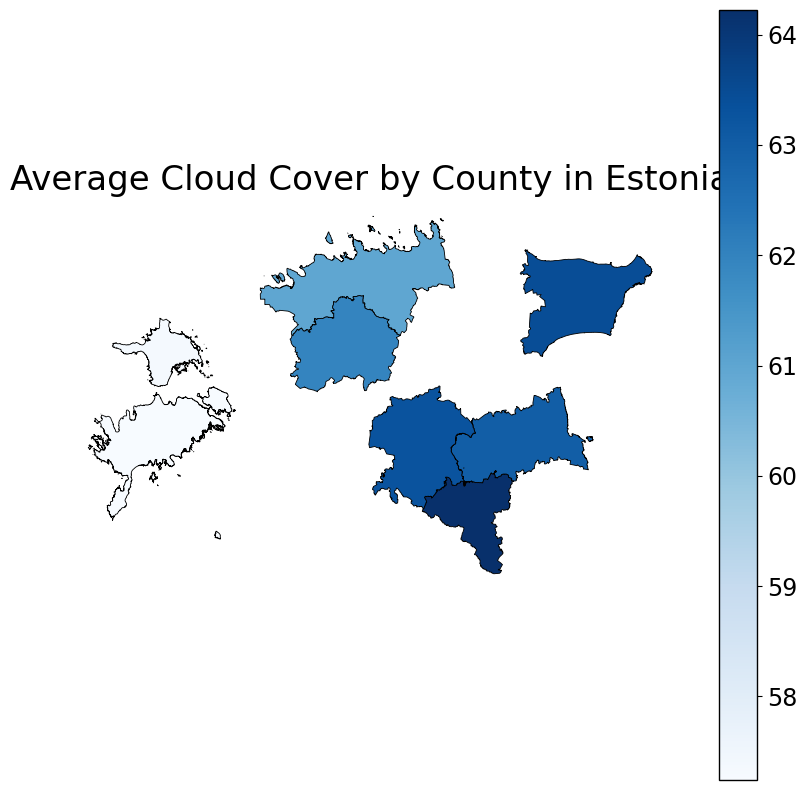

In [118]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
import unicodedata

# Load shapefile

# Load weather data
weather_df = df_avg

# Load JSON and map county IDs to names
with open("county_id_to_name_map.json", "r") as f:
    county_id_to_name = json.load(f)

# Fix the mapping keys
county_id_to_name = {int(k): v for k, v in county_id_to_name.items()}

# Map weather_df county ID to name (e.g., "HARJUMAA")
weather_df["county_name"] = weather_df["county"].map(county_id_to_name)

def normalize(s):
    if isinstance(s, str):
        return unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("utf-8").upper()
    return ""

# Normalize county names from weather and shapefile
weather_df["county_name_norm"] = weather_df["county_name"].apply(normalize)
gdf["VARNAME_norm"] = gdf["VARNAME_1"].apply(lambda x: normalize(x.split("|")[0]))

# Perform inner join on normalized names
merged_gdf = gdf.merge(weather_df, left_on="VARNAME_norm", right_on="county_name_norm", how="inner")

print("Merged shape:", merged_gdf.shape)

# Plot cloudcover_total_h_mean by county
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column="cloudcover_total_h_mean", cmap="Blues", edgecolor="black", linewidth=0.6, legend=True, ax=ax)
ax.set_title("Average Cloud Cover by County in Estonia")
ax.axis("off")
plt.show()

In [119]:
import difflib

# Normalization function
def normalize_name(name):
    if not isinstance(name, str):
        return ""
    name = unicodedata.normalize("NFKD", name).encode("ascii", "ignore").decode("utf-8").upper()
    name = name.replace("MAA", "").replace("KOND", "").replace("-", "").strip()
    return name

# Apply normalization
gdf["match_key"] = gdf["VARNAME_1"].apply(lambda x: normalize_name(x.split("|")[0]))
weather_df["match_key"] = weather_df["county_name"].apply(normalize_name)

# Manual inspection of keys (optional)
print("Shapefile keys:", sorted(gdf["match_key"].unique()))
print("Weather keys:", sorted(weather_df["match_key"].unique()))

Shapefile keys: ['HARJU', 'HIIU', 'IDAVIRU', 'JAERVA', 'JOGEVA', 'LAEAENE', 'LAEAENEVIRU', 'PAERNU', 'PEIPSI JARV', 'POLVA', 'RAPLA', 'SAARE', 'TARTU', 'VALGA', 'VILJANDI', 'VORU']
Weather keys: ['HARJU', 'HIIU', 'IDAVIRU', 'JARVA', 'JOGEVA', 'LAANE', 'LAANEVIRU', 'PARNU', 'POLVA', 'RAPLA', 'SAARE', 'TARTU', 'UNKNOWN', 'VALGA', 'VILJANDI', 'VORU']


In [120]:
manual_fix = {
    "JAERVA": "JARVA",
    "LAEAENE": "LAANE",
    "LAEAENEVIRU": "LAANEVIRU",
    "PAERNU": "PARNU"
}

In [121]:
# Replace match keys in shapefile to match the weather data
gdf["match_key"] = gdf["match_key"].replace(manual_fix)

# Now do the merge
merged_gdf = gdf.merge(weather_df, on="match_key", how="inner")
print("Merged rows:", merged_gdf.shape[0])

Merged rows: 15


<ipython-input-131-ec210e9166c4>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))


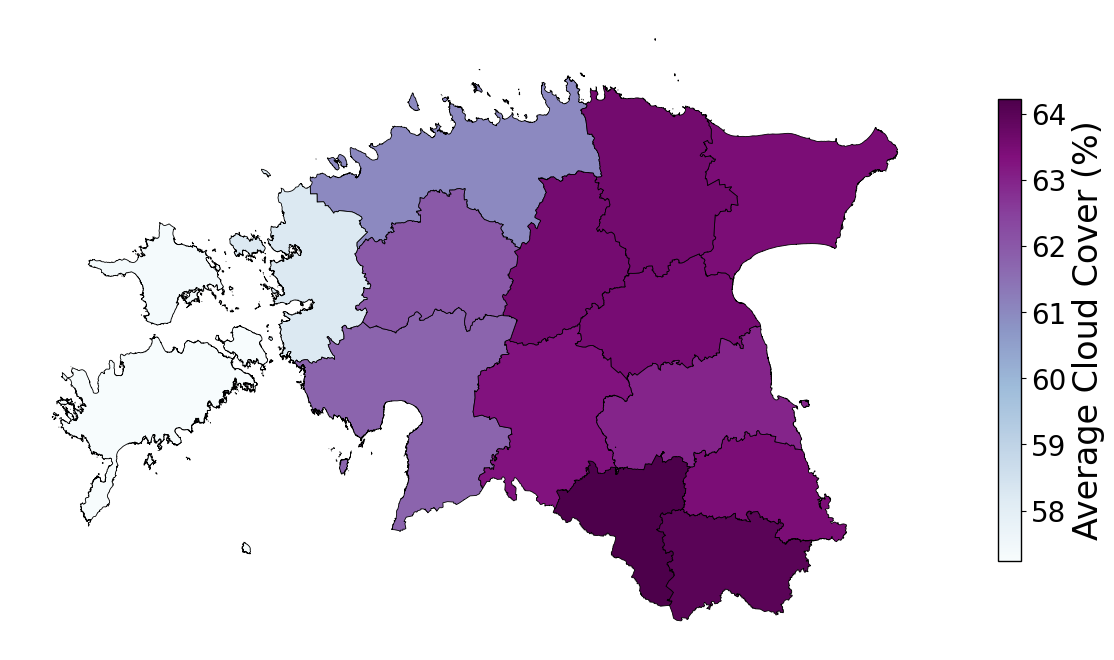

In [131]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (19, 11)
plt.rcParams["font.size"] = 20
plt.rcParams["xtick.color"] = 'black'
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'monospace', etc.
plt.rcParams["axes.labelcolor"] = 'black'
plt.rcParams["axes.linewidth"] = 1

# Plot base map without colorbar
fig, ax = plt.subplots(figsize=(15, 12))
cmap = "BuPu"
column = "cloudcover_total_h_mean"
vmin = merged_gdf["cloudcover_total_h_mean"].min()
vmax = merged_gdf["cloudcover_total_h_mean"].max()

# Plot map and get colormap
merged_gdf.plot(
    column=column,
    cmap=cmap,
    linewidth=0.6,
    edgecolor="black",
    ax=ax,
    vmin=vmin,
    vmax=vmax,
)

# Create a ScalarMappable and custom colorbar
sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Hack to make ScalarMappable work

# Shrink = how tall the colorbar is (relative to plot height)
# Aspect = how thin it is
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=20)  # Try shrink=0.3 for smaller
cbar.set_label("Average Cloud Cover (%)")

# Clean plot
# ax.set_title("Average Cloud Cover by County in Estonia")
ax.axis("off")
plt.show()

<ipython-input-130-b632cdf4c299>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))


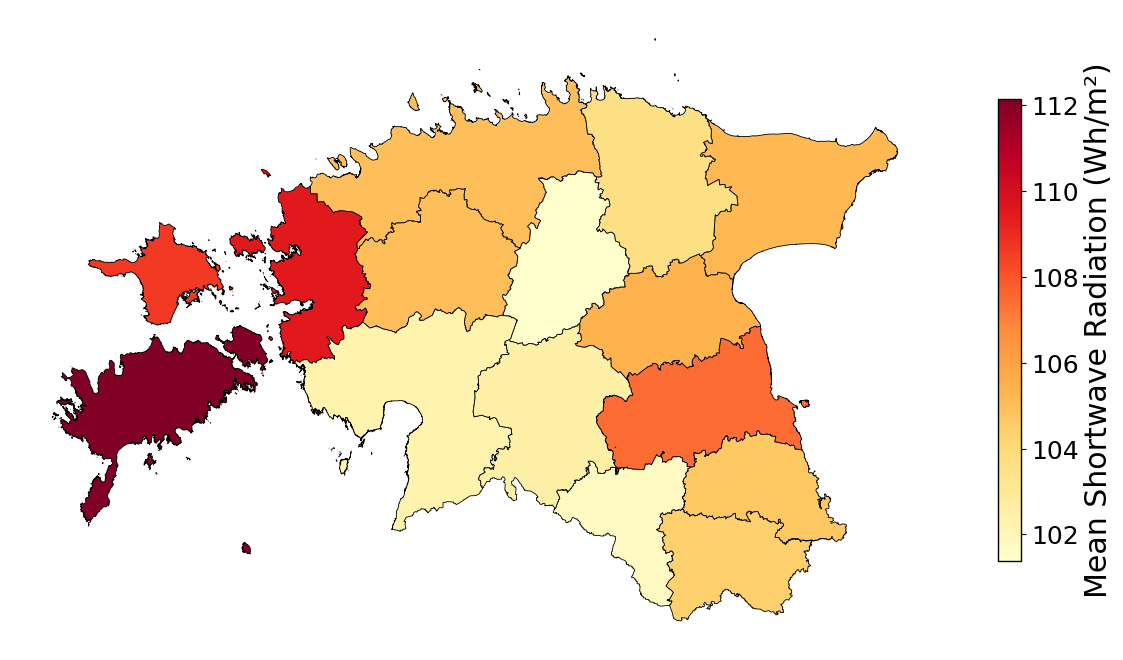

In [130]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (19, 11)
plt.rcParams["font.size"] = 18
plt.rcParams["xtick.color"] = 'black'
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'monospace', etc.
plt.rcParams["axes.labelcolor"] = 'black'
plt.rcParams["axes.linewidth"] = 1

# Plot base map without colorbar
fig, ax = plt.subplots(figsize=(15, 12))
cmap = "YlOrRd"
column = "shortwave_radiation_h_mean"
vmin = merged_gdf["shortwave_radiation_h_mean"].min()
vmax = merged_gdf["shortwave_radiation_h_mean"].max()

# Plot map and get colormap
merged_gdf.plot(
    column=column,
    cmap=cmap,
    linewidth=0.6,
    edgecolor="black",
    ax=ax,
    vmin=vmin,
    vmax=vmax,
)

# Create a ScalarMappable and custom colorbar
sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Hack to make ScalarMappable work

# Shrink = how tall the colorbar is (relative to plot height)
# Aspect = how thin it is
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=20)  # Try shrink=0.3 for smaller
cbar.set_label("Mean Shortwave Radiation (Wh/m²)")

# Clean plot
# ax.set_title("Average Cloud Cover by County in Estonia")
ax.axis("off")
plt.show()

<ipython-input-139-c45e27cbc97b>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))


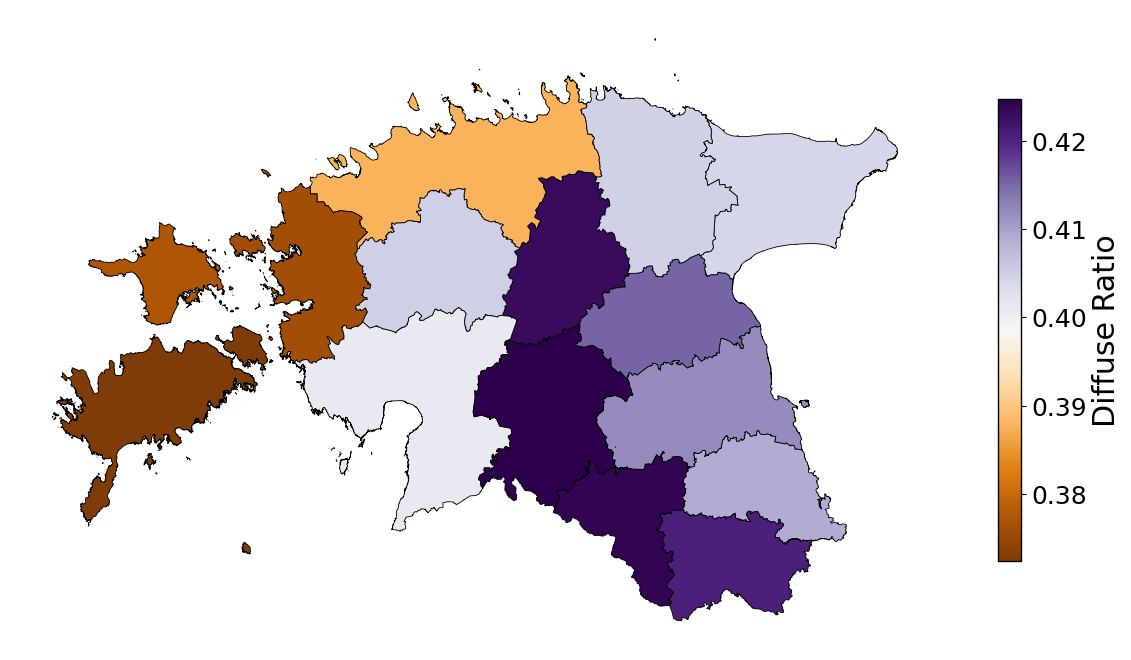

In [139]:
merged_gdf['diffuse_ratio'] = merged_gdf['diffuse_radiation_h_mean'] / merged_gdf['shortwave_radiation_h_mean']

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (19, 11)
plt.rcParams["font.size"] = 18
plt.rcParams["xtick.color"] = 'black'
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'monospace', etc.
plt.rcParams["axes.labelcolor"] = 'black'
plt.rcParams["axes.linewidth"] = 1

# Plot base map without colorbar
fig, ax = plt.subplots(figsize=(15, 12))
cmap = "PuOr"
column = "diffuse_ratio"
vmin = merged_gdf["diffuse_ratio"].min()
vmax = merged_gdf["diffuse_ratio"].max()

# Plot map and get colormap
merged_gdf.plot(
    column=column,
    cmap=cmap,
    linewidth=0.6,
    edgecolor="black",
    ax=ax,
    vmin=vmin,
    vmax=vmax,
)

# Create a ScalarMappable and custom colorbar
sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Hack to make ScalarMappable work

# Shrink = how tall the colorbar is (relative to plot height)
# Aspect = how thin it is
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=20)  # Try shrink=0.3 for smaller
cbar.set_label("Diffuse Ratio")

# Clean plot
# ax.set_title("Average Cloud Cover by County in Estonia")
ax.axis("off")
plt.show()

In [140]:
merged_gdf.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'geometry', 'VARNAME_norm',
       'match_key', 'county', 'temperature_h_mean', 'dewpoint_h_mean',
       'rain_h_mean', 'snowfall_h_mean', 'surface_pressure_h_mean',
       'cloudcover_total_h_mean', 'cloudcover_low_h_mean',
       'cloudcover_mid_h_mean', 'cloudcover_high_h_mean',
       'windspeed_10m_h_mean', 'winddirection_10m_h_mean',
       'shortwave_radiation_h_mean', 'direct_solar_radiation_h_mean',
       'diffuse_radiation_h_mean', 'hour_h', 'cloudcover_high_f_mean',
       'precipitation', 'county_name', 'county_name_norm', 'diffuse_ratio'],
      dtype='object')

<ipython-input-134-921809fae303>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))


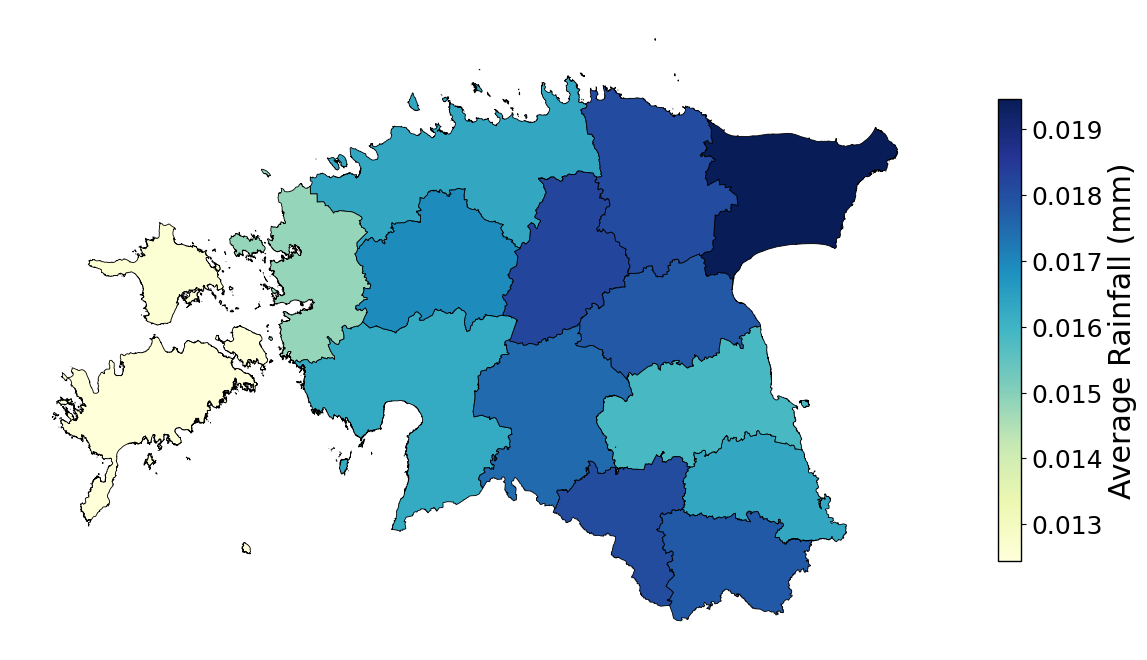

In [134]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Plot base map without colorbar
fig, ax = plt.subplots(figsize=(15, 12))
cmap = "YlGnBu"
column = "snowfall_h_mean"
vmin = merged_gdf["snowfall_h_mean"].min()
vmax = merged_gdf["snowfall_h_mean"].max()

# Plot map and get colormap
merged_gdf.plot(
    column=column,
    cmap=cmap,
    linewidth=0.6,
    edgecolor="black",
    ax=ax,
    vmin=vmin,
    vmax=vmax,
)

# Create a ScalarMappable and custom colorbar
sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Hack to make ScalarMappable work

# Shrink = how tall the colorbar is (relative to plot height)
# Aspect = how thin it is
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=20)  # Try shrink=0.3 for smaller
cbar.set_label("Average Rainfall (mm)")

# Clean plot
# ax.set_title("Average Cloud Cover by County in Estonia")
ax.axis("off")
plt.show()

In [135]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train_features.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Identify historical weather columns
historical_weather_cols = [col for col in df.columns if '_h' in col]

# Keep only rows where at least one historical weather column is not null
df_historical_only = df[df[historical_weather_cols].notna().any(axis=1)].copy()

# Add week column (combining year & week to avoid overlaps)
df_historical_only['year_week'] = df_historical_only['datetime'].dt.strftime('%Y-%U')

# Group by county and week, then sum weather columns over the week
weekly_sums = (
    df_historical_only
    .groupby(['county', 'year_week'])[historical_weather_cols]
    .sum(numeric_only=True)
    .reset_index()
)

# Now average the weekly sums per county
weekly_avg = (
    weekly_sums
    .groupby('county')[historical_weather_cols]
    .mean(numeric_only=True)
    .reset_index()
)

# Result: average weekly totals for each county and weather category
weekly_avg.head()

,county,temperature_h_mean,dewpoint_h_mean,rain_h_mean,snowfall_h_mean,surface_pressure_h_mean,cloudcover_total_h_mean,cloudcover_low_h_mean,cloudcover_mid_h_mean,cloudcover_high_h_mean,windspeed_10m_h_mean,winddirection_10m_h_mean,shortwave_radiation_h_mean,direct_solar_radiation_h_mean,diffuse_radiation_h_mean,hour_h,cloudcover_high_f_mean
0,0,12484.622796,4390.644516,105.579785,37.247376,2.307387e+06,139353.804301,106478.223656,79488.767742,83351.572043,10492.624432,454174.075269,239888.580645,146880.920430,93007.660215,26265.677419,907.020642
1,1,6641.479570,3018.573118,48.080645,12.424624,9.985124e+05,56530.139785,41913.634409,31287.387097,35536.956989,5413.075269,193281.279570,107045.526882,66657.032258,40388.494624,11328.451613,383.846419
2,2,6028.136559,1643.119892,58.694086,24.067957,1.246155e+06,78483.661290,61097.876344,45663.736559,44879.016129,4654.688023,246294.000000,130120.725806,77535.973118,52584.752688,14223.784946,495.367766
3,3,6319.988530,1800.980645,59.555556,23.915412,1.319554e+06,83526.566308,65753.577061,46657.634409,47630.308244,4982.880127,262965.935484,133219.010753,76846.738351,56372.272401,15104.602151,522.063183
4,4,7950.766667,2478.162903,69.930108,28.177258,1.590183e+06,100349.876344,78236.387097,57299.102151,57178.172043,6618.711619,314035.021505,166574.322581,97409.344086,69164.978495,18167.311828,628.809905


In [136]:
weekly_avg['precipitation'] = weekly_avg['rain_h_mean'] + weekly_avg['snowfall_h_mean']

In [137]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
import unicodedata

# Load shapefile

# Load weather data
weather_df = weekly_avg

# Load JSON and map county IDs to names
with open("county_id_to_name_map.json", "r") as f:
    county_id_to_name = json.load(f)

# Fix the mapping keys
county_id_to_name = {int(k): v for k, v in county_id_to_name.items()}

# Map weather_df county ID to name (e.g., "HARJUMAA")
weather_df["county_name"] = weather_df["county"].map(county_id_to_name)

def normalize(s):
    if isinstance(s, str):
        return unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("utf-8").upper()
    return ""

# Normalize county names from weather and shapefile
weather_df["county_name_norm"] = weather_df["county_name"].apply(normalize)
gdf["VARNAME_norm"] = gdf["VARNAME_1"].apply(lambda x: normalize(x.split("|")[0]))

# Perform inner join on normalized names
merged_gdf = gdf.merge(weather_df, left_on="VARNAME_norm", right_on="county_name_norm", how="inner")

print("Merged shape:", merged_gdf.shape)

import difflib

# Normalization function
def normalize_name(name):
    if not isinstance(name, str):
        return ""
    name = unicodedata.normalize("NFKD", name).encode("ascii", "ignore").decode("utf-8").upper()
    name = name.replace("MAA", "").replace("KOND", "").replace("-", "").strip()
    return name

# Apply normalization
gdf["match_key"] = gdf["VARNAME_1"].apply(lambda x: normalize_name(x.split("|")[0]))
weather_df["match_key"] = weather_df["county_name"].apply(normalize_name)

# Manual inspection of keys (optional)
print("Shapefile keys:", sorted(gdf["match_key"].unique()))
print("Weather keys:", sorted(weather_df["match_key"].unique()))

# Replace match keys in shapefile to match the weather data
gdf["match_key"] = gdf["match_key"].replace(manual_fix)

# Now do the merge
merged_gdf = gdf.merge(weather_df, on="match_key", how="inner")
print("Merged rows:", merged_gdf.shape[0])

Merged shape: (8, 33)
Shapefile keys: ['HARJU', 'HIIU', 'IDAVIRU', 'JAERVA', 'JOGEVA', 'LAEAENE', 'LAEAENEVIRU', 'PAERNU', 'PEIPSI JARV', 'POLVA', 'RAPLA', 'SAARE', 'TARTU', 'VALGA', 'VILJANDI', 'VORU']
Weather keys: ['HARJU', 'HIIU', 'IDAVIRU', 'JARVA', 'JOGEVA', 'LAANE', 'LAANEVIRU', 'PARNU', 'POLVA', 'RAPLA', 'SAARE', 'TARTU', 'VALGA', 'VILJANDI', 'VORU']
Merged rows: 15


<ipython-input-138-d4d9f46e1f94>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))


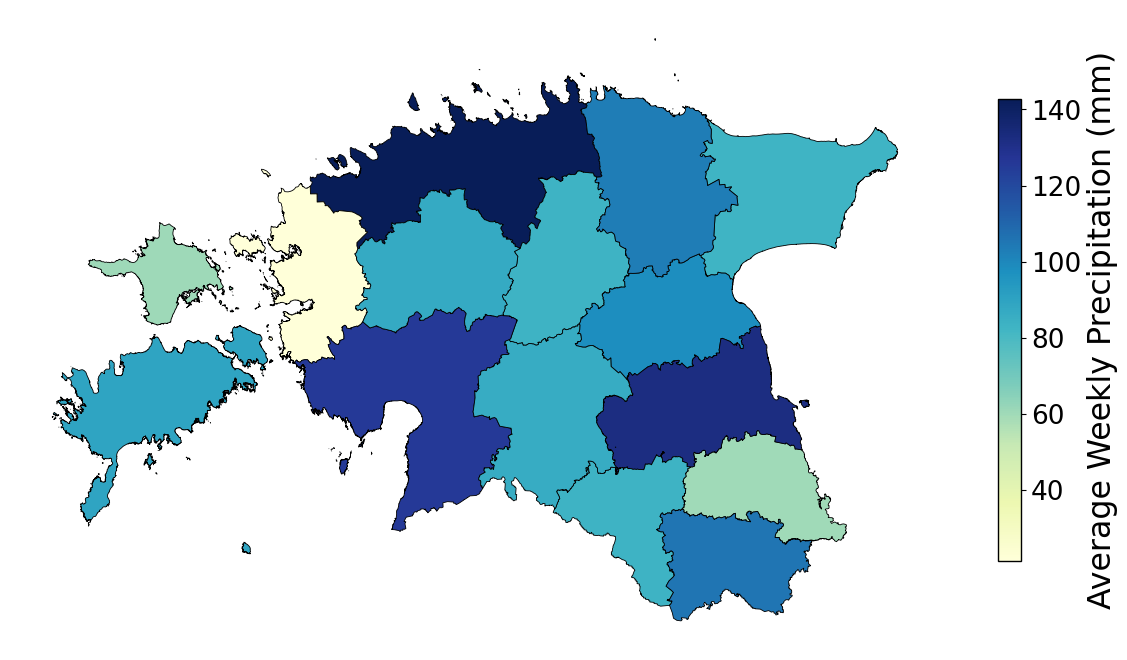

In [138]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (19, 11)
plt.rcParams["font.size"] = 19
plt.rcParams["xtick.color"] = 'black'
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'monospace', etc.
plt.rcParams["axes.labelcolor"] = 'black'
plt.rcParams["axes.linewidth"] = 1

# Plot base map without colorbar
fig, ax = plt.subplots(figsize=(15, 12))
cmap = "YlGnBu"
column = "precipitation"
vmin = merged_gdf["precipitation"].min()
vmax = merged_gdf["precipitation"].max()

# Plot map and get colormap
merged_gdf.plot(
    column=column,
    cmap=cmap,
    linewidth=0.6,
    edgecolor="black",
    ax=ax,
    vmin=vmin,
    vmax=vmax,
)

# Create a ScalarMappable and custom colorbar
sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Hack to make ScalarMappable work

# Shrink = how tall the colorbar is (relative to plot height)
# Aspect = how thin it is
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=20)  # Try shrink=0.3 for smaller
cbar.set_label("Average Weekly Precipitation (mm)")

# Clean plot
# ax.set_title("Average Cloud Cover by County in Estonia")
ax.axis("off")
plt.show()

In [182]:
import pandas as pd

# Load the full dataset
df = pd.read_csv("train_features.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Identify historical and forecast weather columns
historical_weather_cols = [col for col in df.columns if '_h' in col]
forecast_weather_cols = [col for col in df.columns if '_f' in col]
all_weather_cols = historical_weather_cols + forecast_weather_cols

# Keep only rows where at least one weather column is not null
df_weather_only = df[df[all_weather_cols].notna().any(axis=1)].copy()

df_weather_only["temperature_e_mean"] = (df_weather_only["temperature_f_mean"] - df_weather_only["temperature_h_mean"]).abs()
df_weather_only["surface_solar_radiation_downwards_e_mean"] = (df_weather_only["surface_solar_radiation_downwards_f_mean"] - df_weather_only["shortwave_radiation_h_mean"]).abs()
df_weather_only["cloudcover_total_e_mean"] = (df_weather_only["cloudcover_total_f_mean"] - df_weather_only["cloudcover_total_h_mean"]).abs()

# Optionally keep datetime, county, etc. for reference
reference_cols = ['datetime', 'county']
reference_cols = [col for col in reference_cols if col in df.columns]
df_weather_only = df_weather_only[reference_cols + all_weather_cols + ["temperature_e_mean", "surface_solar_radiation_downwards_e_mean", "cloudcover_total_e_mean"]]

# Identify columns to aggregate (exclude datetime and county)
columns_to_average = [col for col in df_weather_only.columns if col not in ['datetime', 'county']]

# Group by county and compute average of each weather column
df_avg = df_weather_only.groupby('county')[columns_to_average].mean(numeric_only=True).reset_index()

# Result: average of all weather variables (historical + forecasted) by county
df_avg.head()

,county,temperature_h_mean,dewpoint_h_mean,rain_h_mean,snowfall_h_mean,surface_pressure_h_mean,cloudcover_total_h_mean,cloudcover_low_h_mean,cloudcover_mid_h_mean,cloudcover_high_h_mean,...,cloudcover_total_f_mean,10_metre_u_wind_component_f_mean,10_metre_v_wind_component_f_mean,direct_solar_radiation_f_mean,surface_solar_radiation_downwards_f_mean,snowfall_f_mean,total_precipitation_f_mean,temperature_e_mean,surface_solar_radiation_downwards_e_mean,cloudcover_total_e_mean
0,0,5.464270,1.921697,0.046210,0.016302,1009.897249,60.992375,46.603390,34.790645,36.481317,...,0.683454,1.119114,0.756360,153.224124,110.396669,0.000027,0.000075,2.300949,34.806013,60.344374
1,1,6.739308,3.063037,0.048789,0.012608,1013.220445,57.362826,42.531020,31.748249,36.060415,...,0.643185,1.539707,0.490695,167.058826,115.513630,0.000020,0.000072,2.138425,35.993181,56.760024
2,2,4.872725,1.328183,0.047444,0.019455,1007.304609,63.440709,49.387255,36.911375,36.277062,...,0.705597,0.746962,0.677983,147.219607,110.689752,0.000033,0.000089,2.627637,38.198773,62.779837
3,3,4.809811,1.370632,0.045325,0.018201,1004.243020,63.567681,50.041593,35.508674,36.248925,...,0.701910,0.860153,0.703561,141.462476,107.914213,0.000028,0.000076,2.805013,38.575230,62.909454
4,4,5.031172,1.568159,0.044251,0.017830,1006.253032,63.500480,49.507267,36.258345,36.181822,...,0.698007,1.056315,0.737528,145.442155,111.484003,0.000028,0.000078,2.625167,38.164734,62.842291


In [170]:
df_avg.columns

Index(['county', 'temperature_h_mean', 'dewpoint_h_mean', 'rain_h_mean',
       'snowfall_h_mean', 'surface_pressure_h_mean', 'cloudcover_total_h_mean',
       'cloudcover_low_h_mean', 'cloudcover_mid_h_mean',
       'cloudcover_high_h_mean', 'windspeed_10m_h_mean',
       'winddirection_10m_h_mean', 'shortwave_radiation_h_mean',
       'direct_solar_radiation_h_mean', 'diffuse_radiation_h_mean', 'hour_h',
       'cloudcover_high_f_mean', 'cloudcover_high_f_mean',
       'hours_ahead_f_mean', 'temperature_f_mean', 'dewpoint_f_mean',
       'cloudcover_high_f_mean', 'cloudcover_high_f_mean',
       'cloudcover_low_f_mean', 'cloudcover_mid_f_mean',
       'cloudcover_total_f_mean', '10_metre_u_wind_component_f_mean',
       '10_metre_v_wind_component_f_mean', 'direct_solar_radiation_f_mean',
       'surface_solar_radiation_downwards_f_mean', 'snowfall_f_mean',
       'total_precipitation_f_mean', 'temperature_e_mean',
       'surface_solar_radiation_downwards_e_mean', 'cloudcover_total_e

Merged shape: (8, 50)


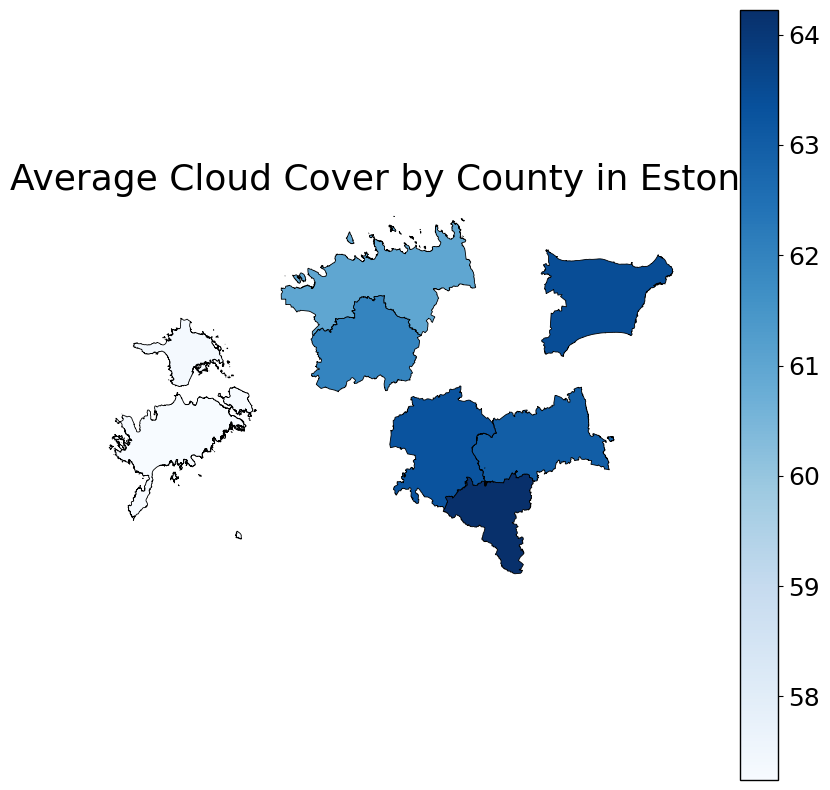

In [183]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
import unicodedata

# Load shapefile

# Load weather data
weather_df = df_avg

# Load JSON and map county IDs to names
with open("county_id_to_name_map.json", "r") as f:
    county_id_to_name = json.load(f)

# Fix the mapping keys
county_id_to_name = {int(k): v for k, v in county_id_to_name.items()}

# Map weather_df county ID to name (e.g., "HARJUMAA")
weather_df["county_name"] = weather_df["county"].map(county_id_to_name)

def normalize(s):
    if isinstance(s, str):
        return unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("utf-8").upper()
    return ""

# Normalize county names from weather and shapefile
weather_df["county_name_norm"] = weather_df["county_name"].apply(normalize)
gdf["VARNAME_norm"] = gdf["VARNAME_1"].apply(lambda x: normalize(x.split("|")[0]))

# Perform inner join on normalized names
merged_gdf = gdf.merge(weather_df, left_on="VARNAME_norm", right_on="county_name_norm", how="inner")

print("Merged shape:", merged_gdf.shape)

# Plot cloudcover_total_h_mean by county
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column="cloudcover_total_h_mean", cmap="Blues", edgecolor="black", linewidth=0.6, legend=True, ax=ax)
ax.set_title("Average Cloud Cover by County in Estonia")
ax.axis("off")
plt.show()

In [184]:
import difflib

# Normalization function
def normalize_name(name):
    if not isinstance(name, str):
        return ""
    name = unicodedata.normalize("NFKD", name).encode("ascii", "ignore").decode("utf-8").upper()
    name = name.replace("MAA", "").replace("KOND", "").replace("-", "").strip()
    return name

# Apply normalization
gdf["match_key"] = gdf["VARNAME_1"].apply(lambda x: normalize_name(x.split("|")[0]))
weather_df["match_key"] = weather_df["county_name"].apply(normalize_name)

# Manual inspection of keys (optional)
print("Shapefile keys:", sorted(gdf["match_key"].unique()))
print("Weather keys:", sorted(weather_df["match_key"].unique()))

Shapefile keys: ['HARJU', 'HIIU', 'IDAVIRU', 'JAERVA', 'JOGEVA', 'LAEAENE', 'LAEAENEVIRU', 'PAERNU', 'PEIPSI JARV', 'POLVA', 'RAPLA', 'SAARE', 'TARTU', 'VALGA', 'VILJANDI', 'VORU']
Weather keys: ['HARJU', 'HIIU', 'IDAVIRU', 'JARVA', 'JOGEVA', 'LAANE', 'LAANEVIRU', 'PARNU', 'POLVA', 'RAPLA', 'SAARE', 'TARTU', 'VALGA', 'VILJANDI', 'VORU']


In [185]:
# Replace match keys in shapefile to match the weather data
gdf["match_key"] = gdf["match_key"].replace(manual_fix)

# Now do the merge
merged_gdf = gdf.merge(weather_df, on="match_key", how="inner")
print("Merged rows:", merged_gdf.shape[0])

Merged rows: 15


In [174]:
merged_gdf.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'geometry', 'match_key',
       'VARNAME_norm', 'county', 'temperature_h_mean', 'dewpoint_h_mean',
       'rain_h_mean', 'snowfall_h_mean', 'surface_pressure_h_mean',
       'cloudcover_total_h_mean', 'cloudcover_low_h_mean',
       'cloudcover_mid_h_mean', 'cloudcover_high_h_mean',
       'windspeed_10m_h_mean', 'winddirection_10m_h_mean',
       'shortwave_radiation_h_mean', 'direct_solar_radiation_h_mean',
       'diffuse_radiation_h_mean', 'hour_h', 'cloudcover_high_f_mean',
       'cloudcover_high_f_mean', 'hours_ahead_f_mean', 'temperature_f_mean',
       'dewpoint_f_mean', 'cloudcover_high_f_mean', 'cloudcover_high_f_mean',
       'cloudcover_low_f_mean', 'cloudcover_mid_f_mean',
       'cloudcover_total_f_mean', '10_metre_u_wind_component_f_mean',
       '10_metre_v_wind_component_f_mean', 'direct_solar_radiation_f_mean',
       'surface_solar_radiation_downwar

<ipython-input-186-575419cb99fa>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))


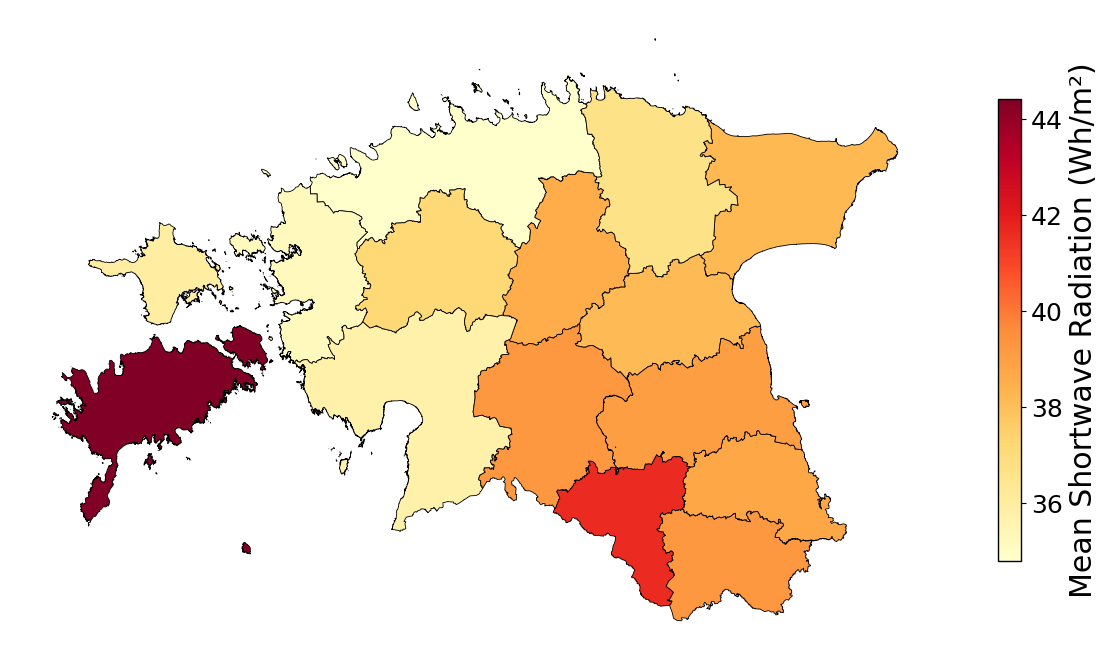

In [186]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (19, 11)
plt.rcParams["font.size"] = 18
plt.rcParams["xtick.color"] = 'black'
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'monospace', etc.
plt.rcParams["axes.labelcolor"] = 'black'
plt.rcParams["axes.linewidth"] = 1

# Plot base map without colorbar
fig, ax = plt.subplots(figsize=(15, 12))
cmap = "YlOrRd"
column = "surface_solar_radiation_downwards_e_mean"
vmin = merged_gdf["surface_solar_radiation_downwards_e_mean"].min()
vmax = merged_gdf["surface_solar_radiation_downwards_e_mean"].max()

# Plot map and get colormap
merged_gdf.plot(
    column=column,
    cmap=cmap,
    linewidth=0.6,
    edgecolor="black",
    ax=ax,
    vmin=vmin,
    vmax=vmax,
)

# Create a ScalarMappable and custom colorbar
sm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap(cmap), norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Hack to make ScalarMappable work

# Shrink = how tall the colorbar is (relative to plot height)
# Aspect = how thin it is
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=20)  # Try shrink=0.3 for smaller
cbar.set_label("Mean Shortwave Radiation (Wh/m²)")

# Clean plot
# ax.set_title("Average Cloud Cover by County in Estonia")
ax.axis("off")
plt.show()